In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('drug_data.csv')

In [24]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drug_name             1436 non-null   object 
 1   manufacturer          1436 non-null   object 
 2   approval_year         1436 non-null   int64  
 3   drug_class            1436 non-null   object 
 4   indications           1436 non-null   object 
 5   side_effects          1436 non-null   object 
 6   dosage_mg             1436 non-null   int64  
 7   administration_route  1436 non-null   object 
 8   contraindications     1436 non-null   object 
 9   warnings              1436 non-null   object 
 10  price_usd             1436 non-null   float64
 11  batch_number          1436 non-null   object 
 12  expiry_date           1436 non-null   object 
 13  side_effect_severity  1436 non-null   object 
 14  approval_status       1436 non-null   object 
dtypes: float64(1), int64(

drug_name               0
manufacturer            0
approval_year           0
drug_class              0
indications             0
side_effects            0
dosage_mg               0
administration_route    0
contraindications       0
warnings                0
price_usd               0
batch_number            0
expiry_date             0
side_effect_severity    0
approval_status         0
dtype: int64

In [25]:
df['approval_status'].value_counts(normalize=True)*100

approval_status
Pending     34.540390
Rejected    33.286908
Approved    32.172702
Name: proportion, dtype: float64

<Axes: xlabel='approval_year'>

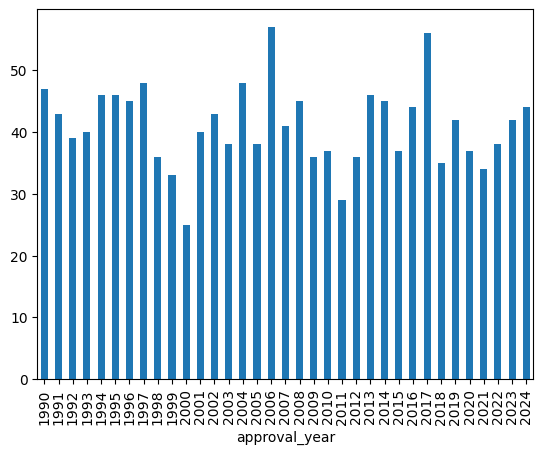

In [26]:
df['approval_year'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='manufacturer'>

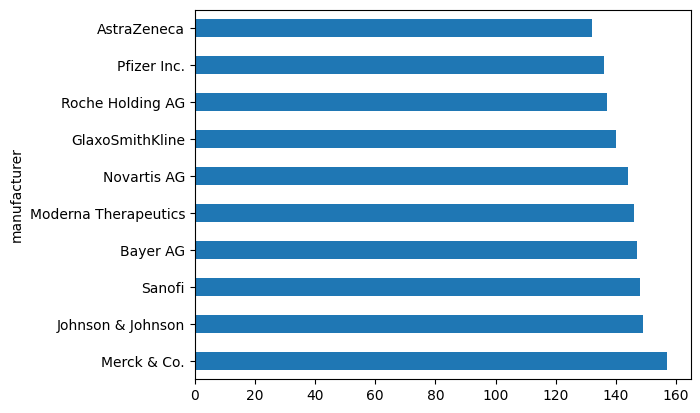

In [16]:
df['manufacturer'].value_counts().plot(kind='barh')


<Axes: xlabel='side_effect_severity', ylabel='dosage_mg'>

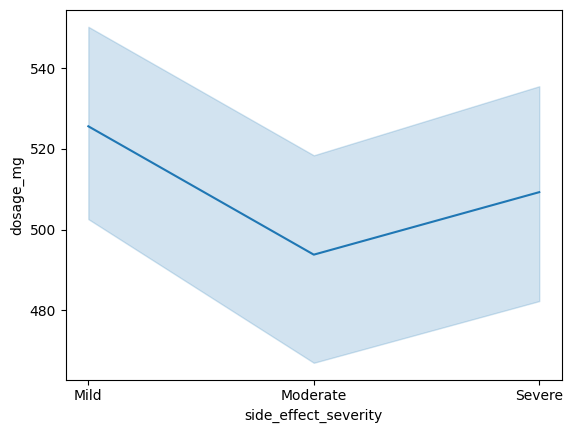

In [28]:
import seaborn as sns
sns.lineplot(x='side_effect_severity', y='dosage_mg', data=df)

<Axes: xlabel='drug_class'>

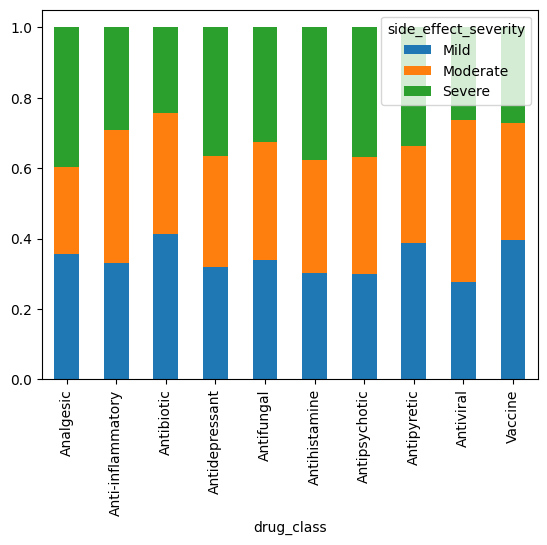

In [29]:
df.groupby('drug_class')['side_effect_severity'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='price_usd', ylabel='Count'>

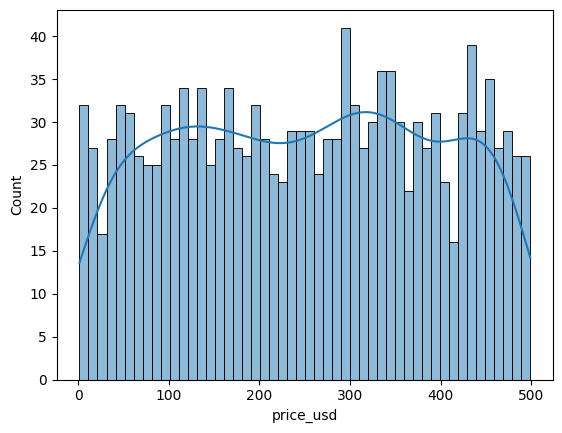

In [30]:
sns.histplot(df['price_usd'], bins=50, kde=True)

<Axes: xlabel='num_side_effects', ylabel='Count'>

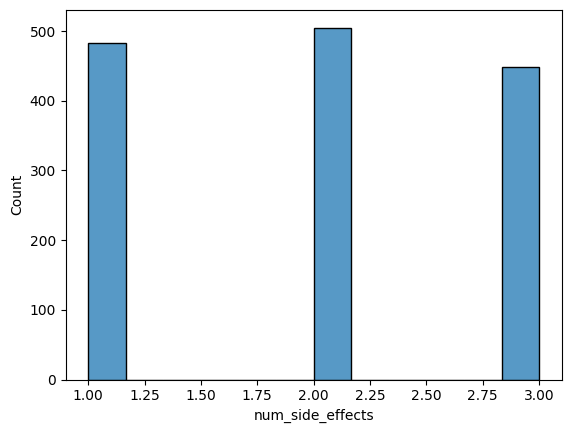

In [31]:
df['num_side_effects'] = df['side_effects'].astype(str).apply(lambda x: len(x.split(',')))
sns.histplot(df['num_side_effects'])

In [32]:
df['expiry_date'] = pd.to_datetime(df['expiry_date'], errors='coerce')
df['days_to_expiry'] = (df['expiry_date'] - pd.to_datetime("today")).dt.days

In [33]:
df['risk_score'] = df['num_side_effects'] * df['side_effect_severity'].map({'Mild':1, 'Moderate':2, 'Severe':3})